<a href="https://colab.research.google.com/github/MartynaPlomecka/AI4Health/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

# Dataframe preparation

In [25]:
beh = pd.read_csv("behaviorals.csv")
foof = pd.read_csv("foof2features.csv")
foof = foof.rename(columns={"C1": "IDs" ,"C2": "Intercept", "C3": "Slope"})

In [26]:
df = pd.merge( foof, beh, on='IDs', how='inner')
#df.head(50)
print(len(df.index))
print(df['DX_01_Cat'].value_counts())

1930
Neurodevelopmental Disorders                                  1256
Anxiety Disorders                                              241
No Diagnosis Given                                             203
Depressive Disorders                                            85
Disruptive, Impulse Control and Conduct Disorders               46
Trauma and Stressor Related Disorders                           30
Obsessive Compulsive and Related Disorders                      18
Elimination Disorders                                           13
Other Conditions That May Be a Focus of Clinical Attention      11
No Diagnosis Given: Incomplete Eval                              9
Bipolar and Related Disorders                                    6
Feeding and Eating Disorders                                     3
Schizophrenia Spectrum and other Psychotic Disorders             3
Neurocognitive Disorders                                         2
Name: DX_01_Cat, dtype: int64


In [27]:
categories = 10
df2 = df.loc[df['DX_01_Cat'].isin(df['DX_01_Cat'].value_counts()[:categories].index.tolist())]
#print(df2['DX_01'])
print(df2['DX_01_Cat'].value_counts())
df2 = df2.rename(columns={"DX_01_Cat": "DiagnosisCategory"})
len(df2.index)


Neurodevelopmental Disorders                                  1256
Anxiety Disorders                                              241
No Diagnosis Given                                             203
Depressive Disorders                                            85
Disruptive, Impulse Control and Conduct Disorders               46
Trauma and Stressor Related Disorders                           30
Obsessive Compulsive and Related Disorders                      18
Elimination Disorders                                           13
Other Conditions That May Be a Focus of Clinical Attention      11
No Diagnosis Given: Incomplete Eval                              9
Name: DX_01_Cat, dtype: int64


1912

In [28]:
df2["label"] = df2["DiagnosisCategory"] 
df = df2

## Neurodevelopmental disorders are heavily overrepresented, that's why we divide this category for 3 subcategories:
### 1. ADHD combined type, 
### 2. ADHD Inattentive type, 
### 3. other neurodevelopmental disorders:

In [29]:
df.loc[df.DX_01 == "ADHD-Combined Type"  , ['label']] = 'ADHD-Combined Type'

In [30]:
df.loc[df.DX_01 == "ADHD-Inattentive Type"  , ['label']] = 'ADHD-Inattentive Type'

In [31]:
df.loc[df.label == "Neurodevelopmental Disorders"  , ['label']] = 'Other Neurodevelopmental Disorders'


In [32]:
#choose only 6 categories
categories = 6
df = df.loc[df['label'].isin(df['label'].value_counts()[:categories].index.tolist())]
#print(df2['DX_01'])
print(df['label'].value_counts())
len(df.index)

Other Neurodevelopmental Disorders    492
ADHD-Inattentive Type                 388
ADHD-Combined Type                    376
Anxiety Disorders                     241
No Diagnosis Given                    203
Depressive Disorders                   85
Name: label, dtype: int64


1785

# Start with classification

In [33]:
#lets run classification with the 2 features only :  intercept and slope

### here the features and labels:
X = df[['Intercept', 'Slope']].to_numpy()
y = df['label'].to_numpy()

### first shot: SVC

In [34]:
#SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

scores = cross_val_score(clf, X, y, cv=5)
score = mean(scores)
score

0.27450980392156865

## Dealing with inbalanced dataset:

In [35]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({'Other Neurodevelopmental Disorders': 492, 'ADHD-Inattentive Type': 388, 'ADHD-Combined Type': 376, 'Anxiety Disorders': 241, 'No Diagnosis Given': 203, 'Depressive Disorders': 85})


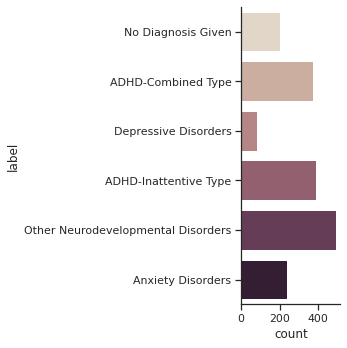

In [36]:
sns.catplot(y="label", kind="count", palette="ch:.25", data=df)

In [37]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({'No Diagnosis Given': 492, 'ADHD-Combined Type': 492, 'Depressive Disorders': 492, 'ADHD-Inattentive Type': 492, 'Other Neurodevelopmental Disorders': 492, 'Anxiety Disorders': 492})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

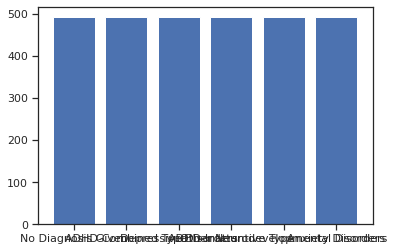

In [38]:
#summarize the oversampled distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Cost-Sensitive Learning for Multi-Class Classification


In [39]:
# cost sensitive random forest with default class weights
#naive baseline = 0.16666
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define the model
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.405 (0.021)
